In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer

# Part A (K-means)

In [2]:
df = pd.read_csv('dataset1.txt',sep = " " ,header = None)

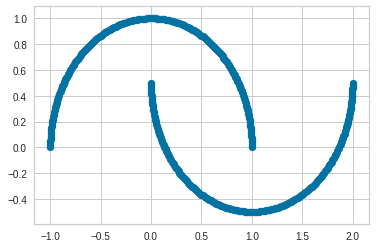

In [3]:
X =  df.values
plt.scatter(X[:,0],X[:,1], label='True Position')  

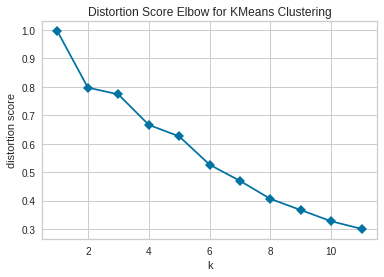

In [4]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12),timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

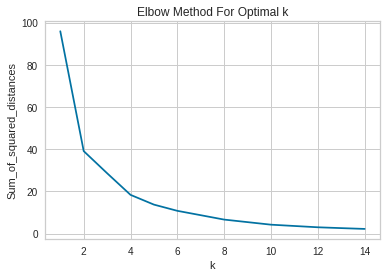

In [5]:
model = MinMaxScaler()
model.fit(X)
X_transformed = model.transform(X)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Kmeans with K=2

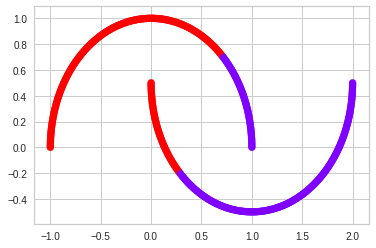

In [6]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  

# Kmeans(K=2) with Centroid in black

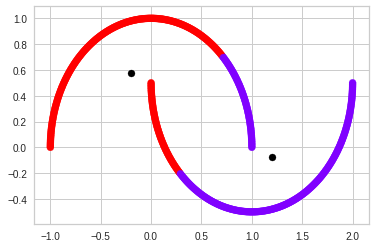

In [7]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 


# Kmeans with K=4 with centroid in black

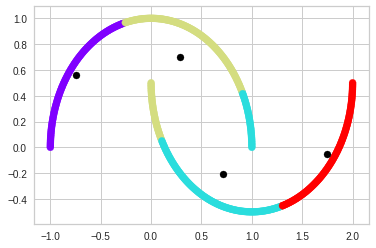

In [8]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

# Part B DBSCAN

In [9]:
MinPts = 5
episilon = 0.05

In [10]:
def inside_circle(x, y, a, b, r):
    return (x - a)*(x - a) + (y - b)*(y - b) < r*r

In [11]:
def DBSCAN(X,MinPts,episilon):
    unvisited = np.zeros(len(X))
    Cluster = []
    while(np.sum(unvisited)!=500):
        rand = np.random.randint(0,500,1)
        #print(rand[0])
        if unvisited[rand[0]] == 0:
            unvisited[rand] = 1
            count = 0
            N = []

            for i in range(0,len(X)):
                c = inside_circle(X[rand,0],X[rand,1],X[i][0],X[i][1],episilon)
                if c == True:
                    N.append(i)
                    count += 1
            if count >= MinPts:
                C = []
                C.append(rand[0])
                for pDash in N:
                    Ndash = []
                    countDash = 0
                    if unvisited[pDash] == 0:
                        unvisited[pDash] = 1
                        for i in range(0,len(X)):
                            c = inside_circle(X[pDash][0],X[pDash][1],X[i][0],X[i][1],episilon)
                            if c == True:
                                Ndash.append(i)
                                countDash += 1
                        if countDash >= MinPts:
                            for pts in Ndash:
                                N.append(pts)
                    if pDash not in Cluster:
                        C.append(pDash)
                Cluster.append(C)
                C = []
    return Cluster

In [12]:
Cluster = DBSCAN(X,MinPts,episilon)
label = np.zeros(len(X))
for i in set(Cluster[0]):
    label[i] = 1

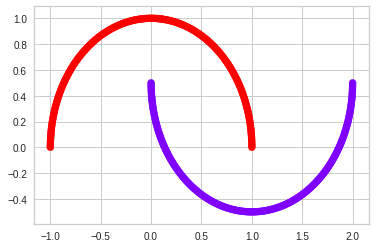

In [13]:
plt.scatter(X[:,0], X[:,1], c=label, cmap='rainbow')  

# Part C

### There is no such difference as in DBSCAN we get only 2 cluster where as in Kmeans we can plot either 2 or 4 clusters. In DBSCAN, clusters are connected and forms semicircle where as in Kmeans when we take k as 4 it takes datapoint that are not connected like from both semicircle.

# Part D (KMeans and DBSCAN for dataset2)

In [14]:
df = pd.read_csv('dataset2.txt',sep = " " ,header = None)

In [15]:
X = df.values

# Plot the Sum_of_squared_distances vs Elbow Method For Optimal k

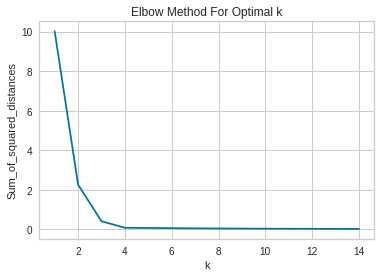

In [16]:
model = MinMaxScaler()
model.fit(X)
X_transformed = model.transform(X)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Kmeans (k=3) on dataset 2

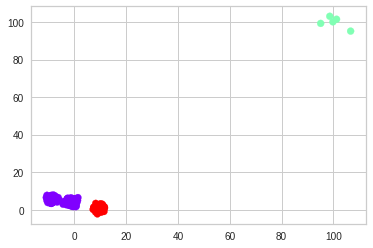

In [17]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  

# Kmeans with centroid in black

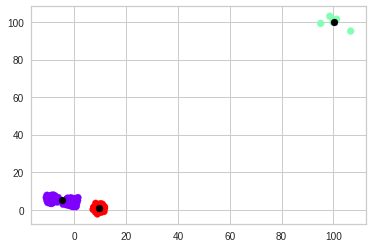

In [18]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 

# DBSCAN on dataset2

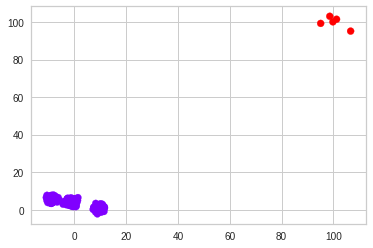

In [19]:
Cluster = DBSCAN(X,5,9) #Cluster = DBSCAN(X,2,9)
label = np.zeros(len(X))
for i in range(len(Cluster)):
    for j in set(Cluster[i]):
        label[j] = i

plt.scatter(X[:,0], X[:,1], c=label, cmap='rainbow')  

## DBSCAN forms two cluster whereas kmeans form 3 cluster. In DBSCAN it is essential to consider hyperparameter.

# Difference between two algo

### PROS of DBSCAN - Clusters of arbitrary shape, Robust to noise, Requires connected regions of sufficiently high density.

### CONS of DBSCAN -Requires connected regions of sufficiently high density, Data sets with varying densities are problematic.

### PROS of KMeans - Easy, Fast
### CONS of DBSCAN - Works only for ”wellshaped” clusters ,Sensitive to outliers, Sensitive to noise.